In [3]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
home = os.path.expanduser('~')
workdir = home + "/XBinary-Classifier"

In [4]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 56.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 54.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
# read the file
filepath = workdir + '/training.fits'
with fits.open(filepath) as data:
    df = pd.DataFrame(data[1].data)
    print(df.columns)

Index(['NAME', 'RA', 'DEC', 'VMAG', 'BV_COLOR', 'PORB', 'FLUX', 'FLUX_MAX',
       'LII', 'BII', 'VMAG_MIN', 'UB_COLOR', 'PULSE_PERIOD', 'target', 'FX',
       'FX_MAX', 'PULSE_PER'],
      dtype='object')


In [28]:
#on notebook just print df
df

,NAME,RA,DEC,VMAG,BV_COLOR,PORB,FLUX,FLUX_MAX,LII,BII,VMAG_MIN,UB_COLOR,PULSE_PERIOD,target,FX,FX_MAX,PULSE_PER
0,SAX J1603.9-7753,240.97500,-77.88500,0.00,0.00,0.0000,160.0,0,312.42847,-18.73093,0.0,0.0,0.0,0,NaN,NaN,NaN
1,2A 0521-720,80.11683,-71.96481,18.00,0.00,0.3400,9.0,44,283.09949,-32.69058,19.0,-0.8,0.0,0,NaN,NaN,NaN
2,RX J0532.7-6926,83.17833,-69.43833,0.00,0.00,0.0000,0.5,0,279.93933,-32.15468,0.0,0.0,0.0,0,NaN,NaN,NaN
3,4U 1254-69,194.40500,-69.28911,19.10,0.30,0.1638,25.0,0,303.48189,-6.42396,0.0,0.0,0.0,0,NaN,NaN,NaN
4,GS 1124-684,171.61125,-68.67572,13.30,0.30,0.4325,3000.0,0,295.30054,-7.07259,0.0,0.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GRO J1750-27,267.30292,-26.64333,0.00,0.00,29.8000,NaN,999999,2.37283,0.50774,0.0,0.0,NaN,1,56.0,0.0,4.45
146,IGR J17544-2619,268.60533,-26.33128,12.65,1.79,0.0000,NaN,999999,3.23599,-0.33559,0.0,0.0,NaN,1,89.0,0.0,0.00
147,3A 0726-260,112.22333,-26.10806,11.60,0.30,34.5000,NaN,999999,240.28165,-4.05037,0.0,-0.6,NaN,1,1.2,4.7,103.20
148,SAX J1819.3-2525,274.83950,-25.42667,8.80,-0.20,2.8000,NaN,999999,6.75638,-4.79765,13.5,1.8,NaN,1,1.0,13000.0,0.00


In [44]:
df['target'] = df['target'].astype(np.int8)
df['FLUX_MAX'] = df['FLUX_MAX'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          150 non-null    object 
 1   RA            150 non-null    float64
 2   DEC           150 non-null    float64
 3   VMAG          150 non-null    float64
 4   BV_COLOR      150 non-null    float64
 5   PORB          150 non-null    float64
 6   FLUX          93 non-null     float64
 7   FLUX_MAX      150 non-null    float64
 8   LII           150 non-null    float64
 9   BII           150 non-null    float64
 10  VMAG_MIN      150 non-null    float64
 11  UB_COLOR      150 non-null    float64
 12  PULSE_PERIOD  93 non-null     float64
 13  target        150 non-null    int8   
 14  FX            57 non-null     float64
 15  FX_MAX        57 non-null     float64
 16  PULSE_PER     57 non-null     float64
dtypes: float64(15), int8(1), object(1)
memory usage: 19.0+ KB


In [66]:
target_column = 'target'
y = df['target']
X = df.drop(['NAME', 'target', 'FX', 'FX_MAX', 'PULSE_PER', 'FLUX', 'PULSE_PERIOD'], axis=1)
X

,RA,DEC,VMAG,BV_COLOR,PORB,FLUX_MAX,LII,BII,VMAG_MIN,UB_COLOR
0,240.97500,-77.88500,0.00,0.00,0.0000,0.0,312.42847,-18.73093,0.0,0.0
1,80.11683,-71.96481,18.00,0.00,0.3400,44.0,283.09949,-32.69058,19.0,-0.8
2,83.17833,-69.43833,0.00,0.00,0.0000,0.0,279.93933,-32.15468,0.0,0.0
3,194.40500,-69.28911,19.10,0.30,0.1638,0.0,303.48189,-6.42396,0.0,0.0
4,171.61125,-68.67572,13.30,0.30,0.4325,0.0,295.30054,-7.07259,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
145,267.30292,-26.64333,0.00,0.00,29.8000,999999.0,2.37283,0.50774,0.0,0.0
146,268.60533,-26.33128,12.65,1.79,0.0000,999999.0,3.23599,-0.33559,0.0,0.0
147,112.22333,-26.10806,11.60,0.30,34.5000,999999.0,240.28165,-4.05037,0.0,-0.6
148,274.83950,-25.42667,8.80,-0.20,2.8000,999999.0,6.75638,-4.79765,13.5,1.8


In [67]:
X = X.dropna(axis=0)
idxs = X.index
y = y.iloc[idxs]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
knn = KNeighborsClassifier(n_neighbors = 4) #choose classifier
KNN_fit = knn.fit(X_train, y_train)#train classifier
accuracy = KNN_fit.score(X_test, y_test) #Estimate the accuracy of the classifier on future data
print ('KNN score: {}\n'.format(accuracy))
cv_scores = cross_val_score(knn, X, y)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

KNN score: 1.0

Cross-validation scores (3-fold): [1. 1. 1. 1. 1.]
Mean cross-validation score (3-fold): 1.000


In [69]:
preds = KNN_fit.predict(X_test)

In [70]:
y_test.shape, preds.shape

((38,), (38,))

In [71]:
cm = confusion_matrix(y_test, preds)
cm

array([[27,  0],
       [ 0, 11]])

In [76]:
cm.shape

(2, 2)

<AxesSubplot:>

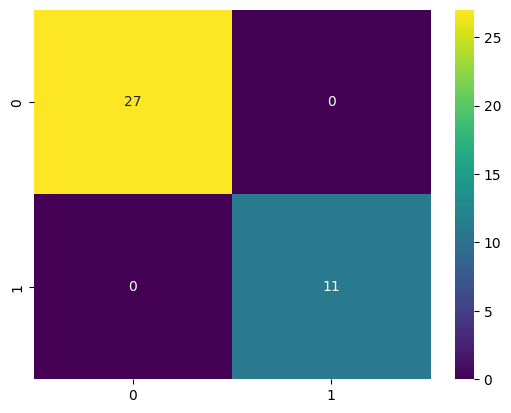

In [80]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')

In [74]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
